<a href="https://colab.research.google.com/github/eunterko/MAT421/blob/main/ModuleG_Section_21_4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 21: Numerical Integration (part 2)**

# *21.4 Simpson’s Rule*

The next method for numerical integration is Simpson's Rule. Using Simpson's Rule, we will consider two consecutive intervals, defining a quadratic polynomial through these points before explicitly integrating that quadratic. Due to this set-up, we must have an even number of intervals, or an odd number of grid points. The most straight-forward way to construct the quadratic polynomial is with Lagrange polynomials, as discussed previously with respect to interpolation. Constructing a Lagrange polynomial over these two consecutive subintervals, and taking the integral gives us the following:

In [ ]:
# \int_{x_{i-1}}^{x_{i+1}} P_i(x)dx = (h/3) * (f(x_{i-1}) + 4f(x_i) + f(x_{i+1}))

Regrouping for the entire interval gives us

In [ ]:
# \int_a^b f(x)dx \approx (h/3) * [f(x_0) + 4*(\sum_{i = 1, i odd}^{n-1} f(x_i)) + 2*(\sum_{i = 2, i even}^{n-2} f(x_i)) + f(x_n)]

To determine the accuracy, we use a Taylor series approximation, giving us

In [ ]:
# \int_{x_{i-1}}^{x_{i+1}} f(x)dx = (h/3) * (f(x_{i-1}) + 4f(x_i) + f(x_{i+1})) + O(h^5)

We thus have an accuracy of O(h^5) for the subintervals, or O(h^4) for the entire interval - a considerable improvement over the previous numerical integration methods. As an example, let's once again consider f(x) = sin(x) on the interval [0,Pi], with 21 evenly spaced grid points:

In [2]:
import numpy as np

a = 0
b = np.pi
n = 21
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

int_simpson = (h/3) * (f[0] + 2*sum(f[:n-2:2]) + 4*sum(f[1:n-1:2]) + f[n-1])
error_simpson = 2 - int_simpson

print(int_simpson)
print(error_simpson)

2.0000067844418012
-6.7844418012441565e-06


Next, let's take a look at some integration functions that we can use in Python.

# *21.5 Computing Integrals in Python*

The library SciPy contains a number of functions in the sub-package integrate which we can use to perform numerical integrations in Python. First, lets consider 'trapz', which works similar to the Trapezoid Rule discussed previously, with the same function and interval used above:

In [3]:
import numpy as np
from scipy.integrate import trapz

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

int_trapz = trapz(f,x)
error_trapz = 2- int_trapz
riemann_trapezoid = (h/2)*(f[0] + 2 * sum(f[1:n-1]) + f[n-1])
riemann_trapezoid_error = 2 - riemann_trapezoid

print(int_trapz)
print(error_trapz)

print(riemann_trapezoid)
print(riemann_trapezoid_error)

1.9835235375094544
0.016476462490545574
1.9835235375094546
0.01647646249054535


We similarly have the function 'cumtrapz', which utilizes the cumulative sum function cumsum, allowing us to more simply graph the numerical integral. Using the same example as before, with space discritization of 0.1:

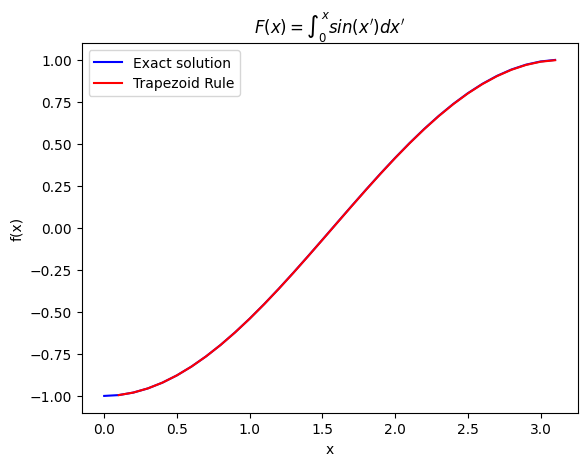

In [15]:
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt
plt.style.use('default')

x = np.arange(0, np.pi, 0.1)
F = -np.cos(x)
F_riemann_trapezoid = cumtrapz(np.sin(x), x) - 1

plt.plot(x, F,'b-')
plt.plot(x[1::], F_riemann_trapezoid,'r-')
plt.title('$F(x) = \int_0^{x} sin(x\') dx\'$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['Exact solution', 'Trapezoid Rule'])
plt.show()

The final function is this sub-package that we will consider is 'quad'. Using the same example as above:

In [14]:
from scipy.integrate import quad 

int_quad, est_error_quad = quad(np.sin, 0, np.pi)
error_quad = 2 - int_quad

print(int_quad)
print(est_error_quad)
print(error_quad)

2.0
2.220446049250313e-14
0.0


We see that this function is highly accurate. In conlcusion, there are a number of ways to calculate numerical integrals in Python, which we can select based on accuracy or utility depnding on the situation. 